## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [28]:
import pandas as pd

df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'])
df = df.dropna()

print(df)



                     DATE       TAG   POSTS
1     2008-07-01 00:00:00        c#     3.0
2     2008-08-01 00:00:00  assembly     8.0
3     2008-08-01 00:00:00         c    83.0
4     2008-08-01 00:00:00        c#   503.0
5     2008-08-01 00:00:00       c++   164.0
...                   ...       ...     ...
2631  2024-05-01 00:00:00       php  1207.0
2632  2024-05-01 00:00:00    python  7136.0
2633  2024-05-01 00:00:00         r  1396.0
2634  2024-05-01 00:00:00      ruby   121.0
2635  2024-05-01 00:00:00     swift   644.0

[2635 rows x 3 columns]


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [29]:
print(df.head())
print(df.tail())

                  DATE       TAG  POSTS
1  2008-07-01 00:00:00        c#    3.0
2  2008-08-01 00:00:00  assembly    8.0
3  2008-08-01 00:00:00         c   83.0
4  2008-08-01 00:00:00        c#  503.0
5  2008-08-01 00:00:00       c++  164.0
                     DATE     TAG   POSTS
2631  2024-05-01 00:00:00     php  1207.0
2632  2024-05-01 00:00:00  python  7136.0
2633  2024-05-01 00:00:00       r  1396.0
2634  2024-05-01 00:00:00    ruby   121.0
2635  2024-05-01 00:00:00   swift   644.0


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [30]:
rows = df.shape[0]
cols = df.shape[1]

print(f"# of rows: {rows}")
print(f"# of cols: {cols}")

# of rows: 2635
# of cols: 3


**Challenge**: Count the number of entries in each column of the dataframe

In [31]:
print(rows*cols)

7905


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [59]:
languages = df.groupby("TAG").sum()
print(languages)

max_posts_index = languages['POSTS'].idxmax()
print(f"Contains most posts of all time: {max_posts_index}")


                                                         DATE      POSTS
TAG                                                                     
assembly    2008-08-01 00:00:002008-09-01 00:00:002008-10-...    44491.0
c           2008-08-01 00:00:002008-09-01 00:00:002008-10-...   404637.0
c#          2008-07-01 00:00:002008-08-01 00:00:002008-09-...  1616917.0
c++         2008-08-01 00:00:002008-09-01 00:00:002008-10-...   807923.0
delphi      2008-08-01 00:00:002008-09-01 00:00:002008-10-...    51987.0
go          2009-11-01 00:00:002009-12-01 00:00:002010-01-...    73111.0
java        2008-08-01 00:00:002008-09-01 00:00:002008-10-...  1917242.0
javascript  2008-08-01 00:00:002008-09-01 00:00:002008-10-...  2528582.0
perl        2008-08-01 00:00:002008-09-01 00:00:002008-10-...    68121.0
php         2008-08-01 00:00:002008-09-01 00:00:002008-10-...  1464741.0
python      2008-08-01 00:00:002008-09-01 00:00:002008-10-...  2196074.0
r           2008-09-01 00:00:002008-11-01 00:00:002

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [71]:

months_of_data = df.groupby('TAG').count()
min_months = months_of_data["DATE"].idxmin()
print(min_months)

go


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [78]:
date = df["DATE"][1]


Timestamp('2008-07-01 00:00:00')

In [145]:
pd.to_datetime(date)

Timestamp('2008-07-01 00:00:00')

In [166]:
pd.to_datetime(df.DATE, yearfirst=True)

AttributeError: 'Series' object has no attribute 'year'

## Data Manipulation



In [ ]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
print(test_df)

pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
pivoted_df

     Age      Actor  Power
0  Young       Jack    100
1  Young     Arnold     80
2  Young      Keanu     25
3  Young  Sylvester     50
4    Old       Jack     99
5    Old     Arnold     75
6    Old      Keanu      5
7    Old  Sylvester     30


Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [ ]:
print(df.DATE)
reshaped_df =df.pivot(index='DATE', columns='TAG', values="POSTS")

print(reshaped_df.shape)






1       2008-07-01 00:00:00
2       2008-08-01 00:00:00
3       2008-08-01 00:00:00
4       2008-08-01 00:00:00
5       2008-08-01 00:00:00
               ...         
2631    2024-05-01 00:00:00
2632    2024-05-01 00:00:00
2633    2024-05-01 00:00:00
2634    2024-05-01 00:00:00
2635    2024-05-01 00:00:00
Name: DATE, Length: 2635, dtype: object
(191, 14)


In [ ]:
print(reshaped_df.columns)

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')


In [ ]:
print(reshaped_df.head())

TAG                  assembly      c      c#    c++  delphi  go    java  \
DATE                                                                      
2008-07-01 00:00:00       NaN    NaN     3.0    NaN     NaN NaN     NaN   
2008-08-01 00:00:00       8.0   83.0   503.0  164.0    13.0 NaN   222.0   
2008-09-01 00:00:00      28.0  320.0  1639.0  755.0   104.0 NaN  1128.0   
2008-10-01 00:00:00      16.0  303.0  1987.0  806.0   112.0 NaN  1148.0   
2008-11-01 00:00:00      16.0  258.0  1729.0  734.0   140.0 NaN   954.0   

TAG                  javascript   perl    php  python    r   ruby  swift  
DATE                                                                      
2008-07-01 00:00:00         NaN    NaN    NaN     NaN  NaN    NaN    NaN  
2008-08-01 00:00:00       163.0   28.0  157.0   119.0  NaN   70.0    NaN  
2008-09-01 00:00:00       634.0  130.0  474.0   536.0  6.0  286.0    NaN  
2008-10-01 00:00:00       722.0  128.0  604.0   506.0  NaN  246.0    NaN  
2008-11-01 00:00:00     

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [ ]:
reshaped_df.count()

TAG
assembly      190
c             190
c#            191
c++           190
delphi        190
go            175
java          190
javascript    190
perl          190
php           190
python        190
r             188
ruby          190
swift         181
dtype: int64

In [ ]:
reshaped_df.fillna(0, inplace=True)
reshaped_df.count()

TAG
assembly      191
c             191
c#            191
c++           191
delphi        191
go            191
java          191
javascript    191
perl          191
php           191
python        191
r             191
ruby          191
swift         191
dtype: int64

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

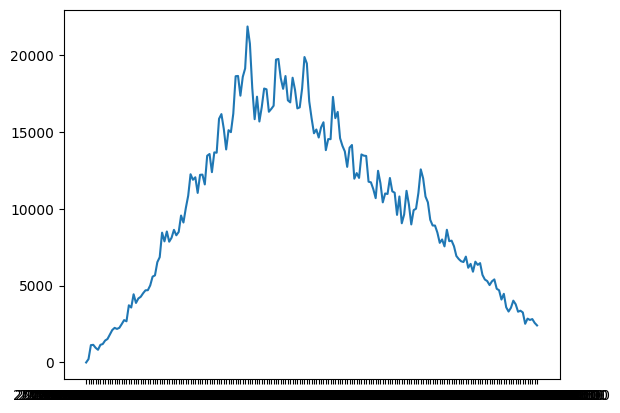

In [ ]:
import matplotlib.pyplot as plt

plt.plot(reshaped_df.index, reshaped_df.java)

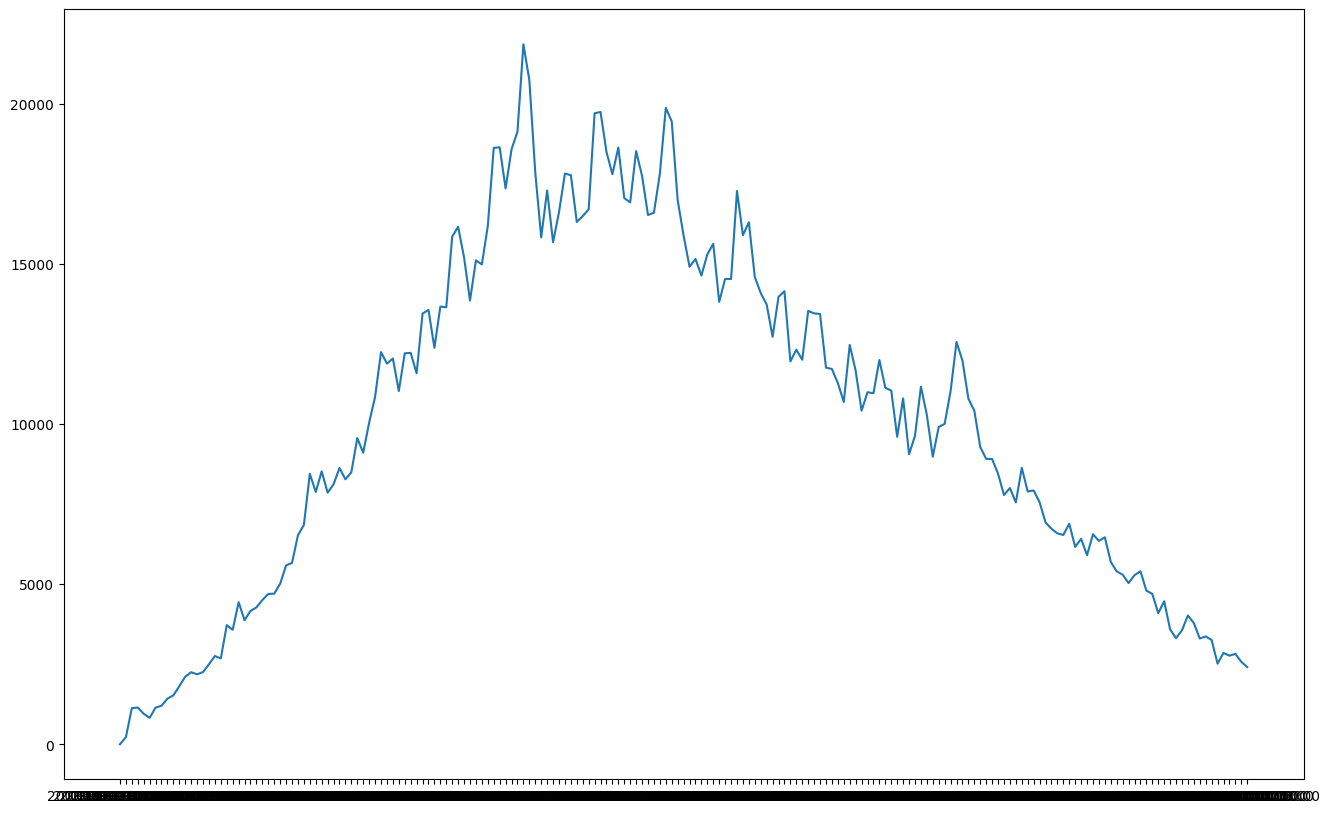

In [ ]:
plt.figure(figsize=(16,10)) 
plt.plot(reshaped_df.index, reshaped_df.java)

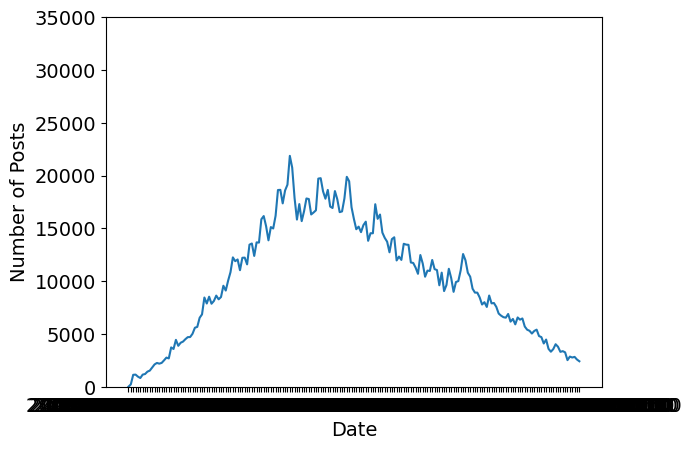

In [170]:
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

                    DATE    java  python
0    2008-07-01 00:00:00     0.0     0.0
1    2008-08-01 00:00:00   222.0   119.0
2    2008-09-01 00:00:00  1128.0   536.0
3    2008-10-01 00:00:00  1148.0   506.0
4    2008-11-01 00:00:00   954.0   448.0
..                   ...     ...     ...
186  2024-01-01 00:00:00  2853.0  7699.0
187  2024-02-01 00:00:00  2767.0  7781.0
188  2024-03-01 00:00:00  2824.0  7369.0
189  2024-04-01 00:00:00  2575.0  7343.0
190  2024-05-01 00:00:00  2411.0  7136.0

[191 rows x 3 columns]


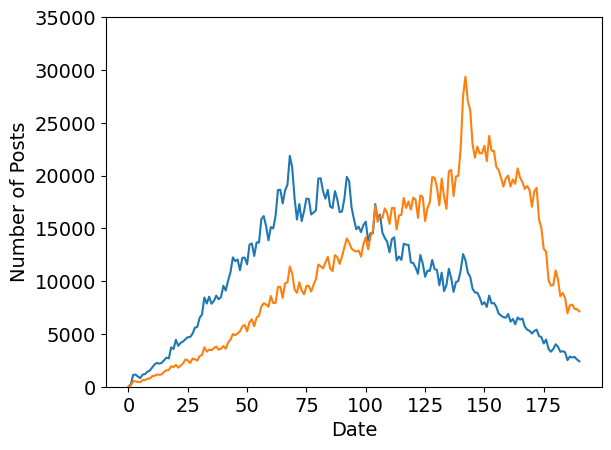

In [183]:
java_python_df = pd.concat([reshaped_df.java,reshaped_df.python], axis=1).reset_index()
print(java_python_df)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(java_python_df.index, reshaped_df.java)
plt.plot(java_python_df.index, reshaped_df.python)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

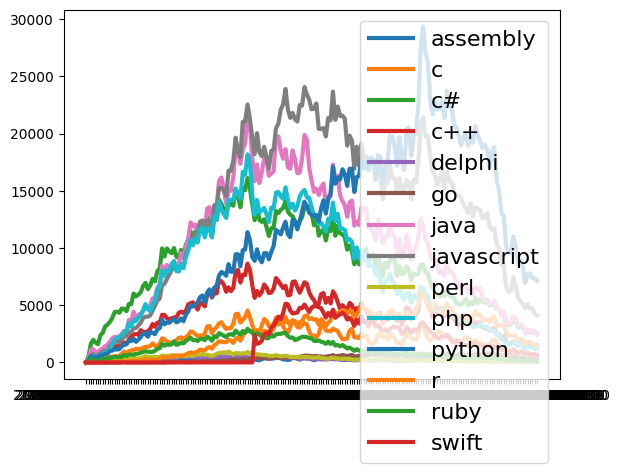

In [184]:
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)
plt.legend(fontsize=16)

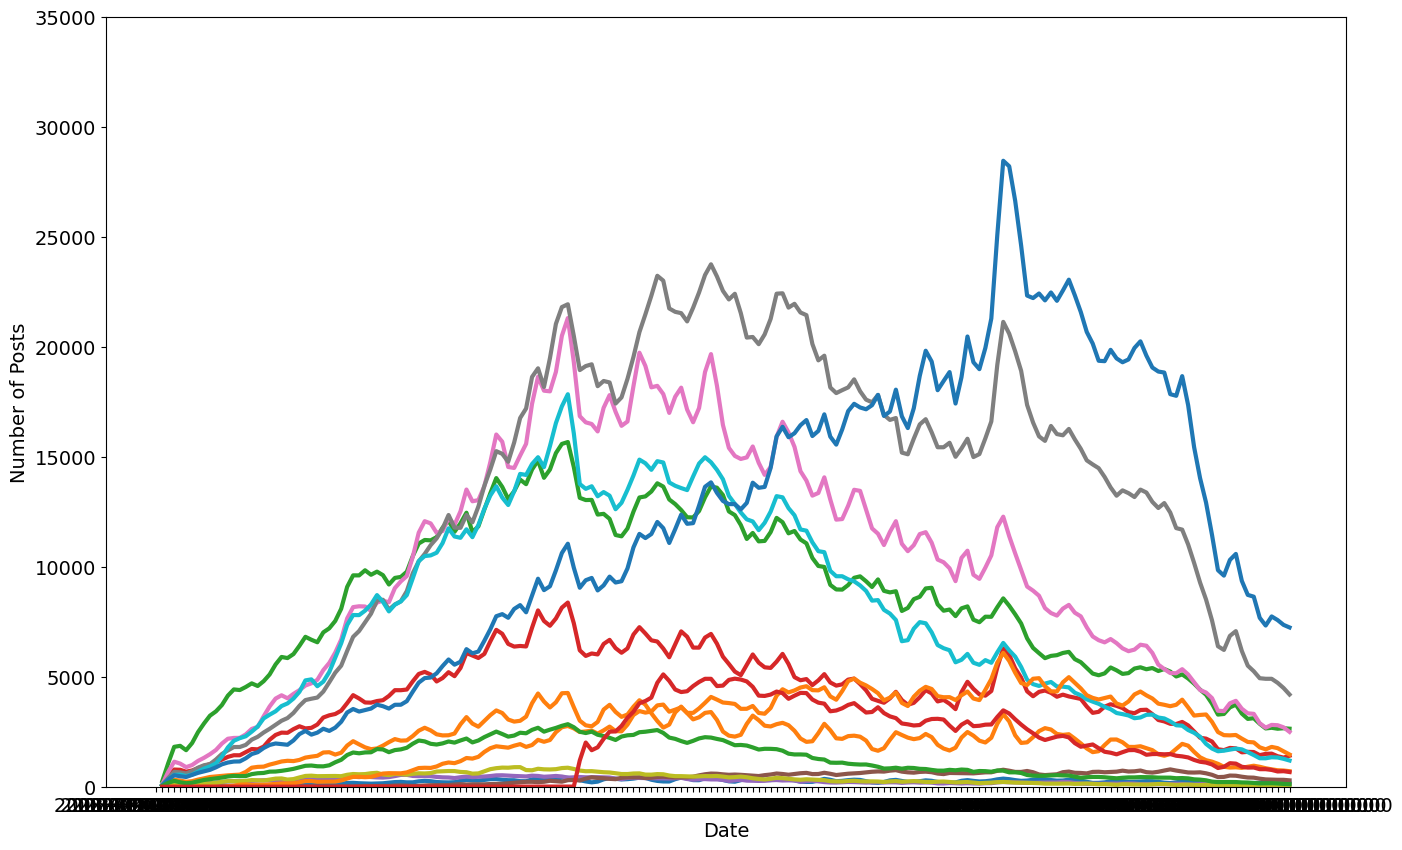

In [188]:
roll_df = reshaped_df.rolling(window=30).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)